CNN

In [ ]:
import numpy as np
import torch
import torch.nn as nn

import matplotlib.pyplot as plt

In [ ]:
inChans = 3
outChans = 15
krnSize = 5
stride = 1
padding = 0

In [ ]:
c = nn.Conv2d(inChans, outChans, krnSize, stride, padding)

In [ ]:
print(c)

Conv2d(3, 15, kernel_size=(5, 5), stride=(1, 1))


In [ ]:
print("Size of weights: " + str(c.weight.shape))
print("Size of bias: " + str(c.bias.shape))

Size of weights: torch.Size([15, 3, 5, 5])
Size of bias: torch.Size([15])


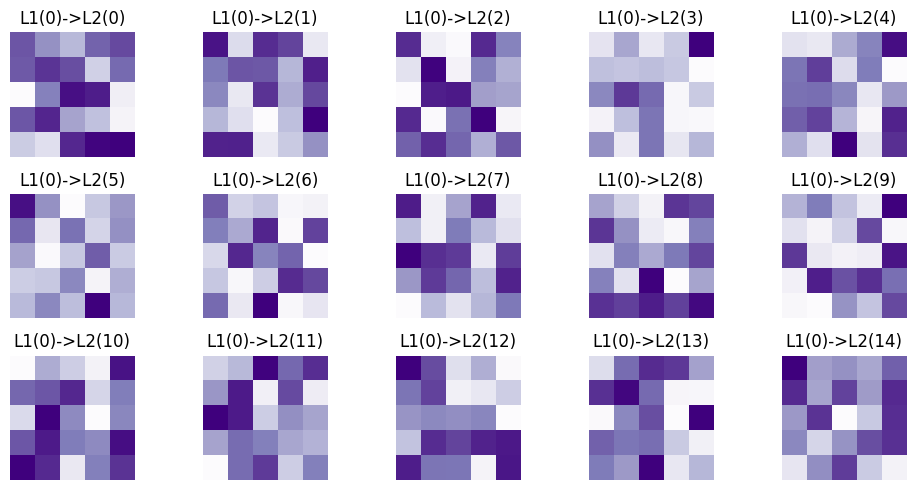

In [ ]:
fig, axs = plt.subplots(3,5, figsize = (10,5))

for i, ax in enumerate(axs.flatten()):
    ax.imshow(torch.squeeze(c.weight[i, 0, :, :]).detach(), cmap = 'Purples')
    ax.set_title('L1(0)->L2(%s)'%i)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
imsize = (1, 3, 64, 64)
img = torch.rand(imsize)

img2view = img.permute(2,3,1,0).numpy()
print(img.shape)
print(img2view.shape)

torch.Size([1, 3, 64, 64])
(64, 64, 3, 1)


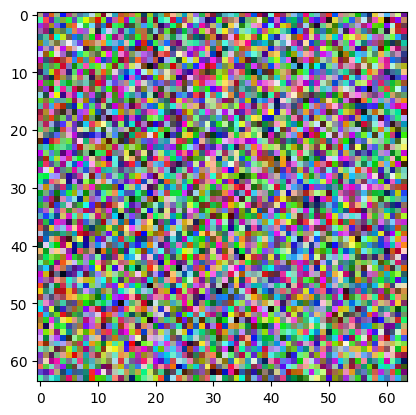

In [ ]:
plt.imshow(np.squeeze(img2view))

In [ ]:
convRes = c(img)
print(img.shape)
print(convRes.shape)

torch.Size([1, 3, 64, 64])
torch.Size([1, 15, 60, 60])


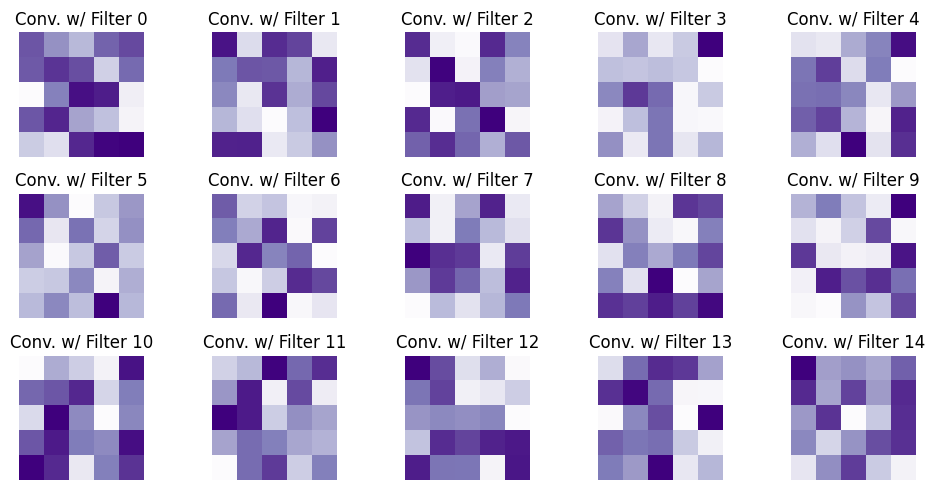

In [ ]:
fig, axs = plt.subplots(3,5, figsize = (10,5))

for i, ax in enumerate(axs.flatten()):
    I = torch.squeeze(c.weight[i, 0, :, :]).detach()
    ax.imshow(I, cmap = 'Purples')
    ax.set_title('Conv. w/ Filter %s' %i)
    ax.axis('off')

plt.tight_layout()
plt.show()

CNN on MINST

In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
K = len(set(y_train))
print("Number of classes: ", K)

Number of classes:  10


In [ ]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = 'softmax')(x)

model = Model(i, x)

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 44s 22ms/step - loss: 0.5220 - accuracy: 0.8074 - val_loss: 0.3967 - val_accuracy: 0.8521
Epoch 2/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3601 - accuracy: 0.8648 - val_loss: 0.3440 - val_accuracy: 0.8717
Epoch 3/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3092 - accuracy: 0.8824 - val_loss: 0.3201 - val_accuracy: 0.8817
Epoch 4/15
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2771 - accuracy: 0.8958 - val_loss: 0.3090 - val_accuracy: 0.8865
Epoch 5/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2541 - accuracy: 0.9040 - val_loss: 0.2967 - val_accuracy: 0.8943
Epoch 6/15
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2343 - accuracy: 0.9112 - val_loss: 0.2993 - val_accuracy: 0.8914
Epoch 7/15
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2157 - accuracy: 0.9183 - val_loss: 0.2886 -

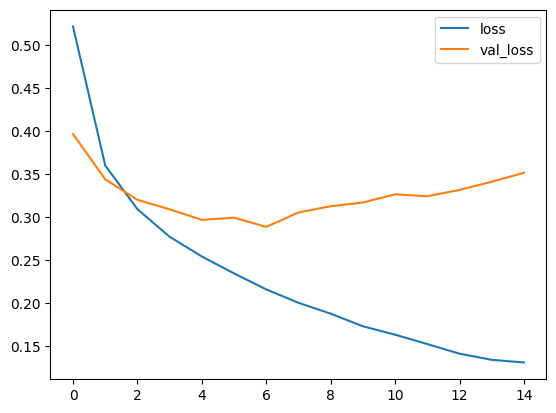

In [ ]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

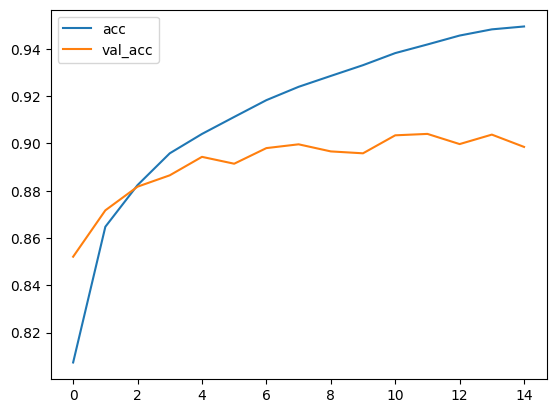

In [ ]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

313/313 [==============================] - 2s 5ms/step
Confusion matrix, without normalization
[[850   0  25  27   3   1  90   0   4   0]
 [  2 971   0  15   4   1   5   0   2   0]
 [ 25   0 885  11  44   0  35   0   0   0]
 [ 11   2  17 914  33   1  21   0   1   0]
 [  2   1  71  25 841   0  60   0   0   0]
 [  0   0   0   2   0 972   0  18   0   8]
 [112   1  81  27  99   0 665   0  15   0]
 [  0   0   0   0   0  11   0 979   0  10]
 [  1   0  10   4   2   3   8   2 970   0]
 [  0   0   0   0   0   7   1  54   0 938]]


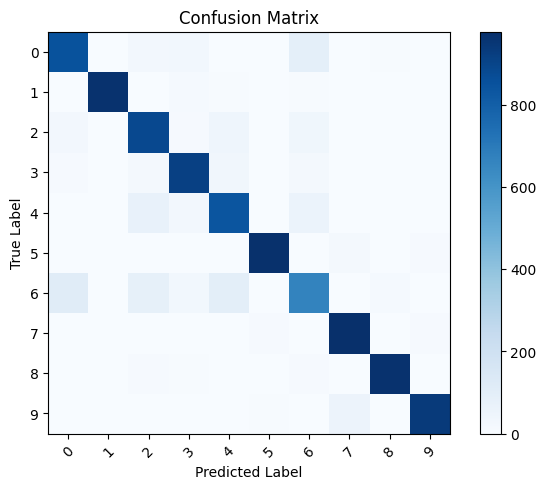

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize = False,
                          title = 'Confusion Matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

p_test = model.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split('\n')

Text(0.5, 1.0, 'True Label: Shirt Predicted: T-shirt/top')

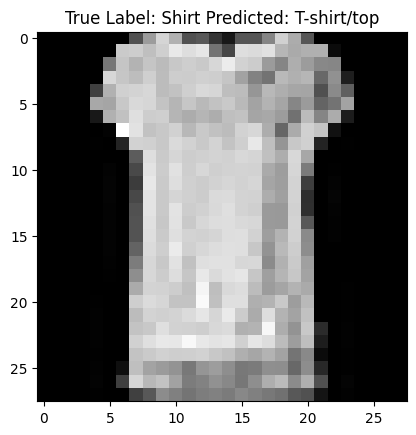

In [ ]:
misclassified_ind = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_ind)
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))